###  Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

# Hierarchical Clustering

In [2]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Normalization function 


In [3]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

###  Normalized data frame (considering the numerical part of data)

In [4]:
df_norm = norm_func(crime.iloc[:,1:5])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


### Create dendrogram

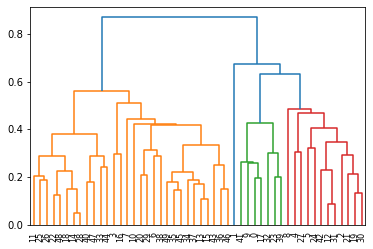

In [5]:
dendrogram_1 = sch.dendrogram(sch.linkage(df_norm, method = 'average')) 

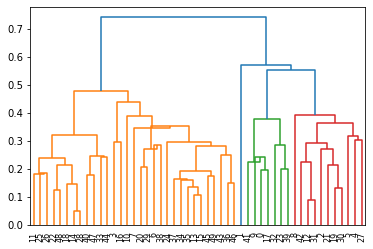

In [6]:
dendrogram_2 = sch.dendrogram(sch.linkage(df_norm, method = 'centroid'))

###  Create Clusters

In [7]:
c = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

### Save cluster for chart

In [8]:
y_c = c.fit_predict(df_norm)

In [9]:
y_c

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [10]:
crime['cluster'] = y_c
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [11]:
crime.iloc[:,1:4].groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop
cluster,,,
0,12.165,255.25,68.4
1,5.715,132.30,70.8
2,3.180,78.70,49.3


# KMeans Clustering

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [13]:
cri = pd.read_csv('crime_data.csv')
cri.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<AxesSubplot:xlabel='X', ylabel='Y'>

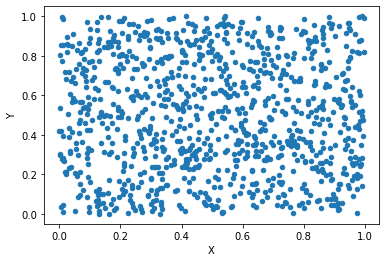

In [14]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy = pd.DataFrame(columns =["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x = 'X', y = 'Y', kind = 'scatter')

In [15]:
X = np.random.uniform(0,1,1000)

<AxesSubplot:xlabel='X', ylabel='Y'>

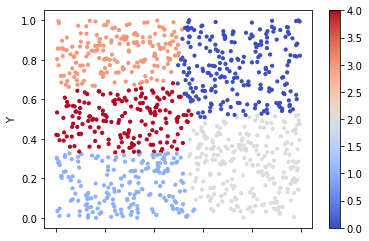

In [16]:
model1 = KMeans(n_clusters = 5).fit(df_xy)
df_xy.plot(x = 'X', y = 'Y',c = model1.labels_, kind = 'scatter',s = 10, cmap = plt.cm.coolwarm)

###  Normalization function

In [17]:
def norm_func(i):
    S =(i - i.min())/(i.max()-i.min())
    return(S)

###  Normalized data frame (considering the numerical part of data)

In [18]:
df_norm = norm_func(cri.iloc[:,1:5])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Elbow curve

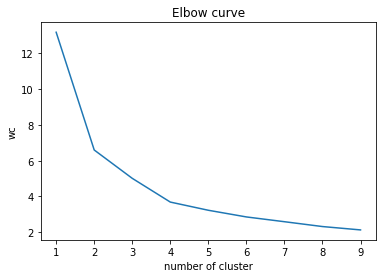

In [19]:
wc = []
for i in range (1,10):
    Kmeans = KMeans(n_clusters = i , random_state = 0)
    Kmeans.fit(df_norm)
    wc.append(Kmeans.inertia_)
plt.plot(range(1,10),wc)
plt.title('Elbow curve')
plt.xlabel('number of cluster')
plt.ylabel('wc')
plt.show()

###  selecting 4 clusters from the above screen plot which is the optimum number of clusters

In [20]:
model = KMeans(n_clusters = 4)
model.fit(df_norm)
# model.labels  # getting the labels clusters assinged to each row
md = pd.Series(model.labels_)

In [21]:
cri['clusters']= md
cri

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [22]:
cri.iloc[:,1:].groupby(cri.clusters).mean()

,Murder,Assault,UrbanPop,Rape,clusters
clusters,,,,,
0,5.852941,141.176471,73.647059,19.335294,0
1,13.937500,243.625000,53.750000,21.412500,1
2,3.600000,78.538462,52.076923,12.176923,2
3,10.966667,264.000000,76.500000,33.608333,3


# DBSCAN Clustering

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [24]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
df_norm = (crime.iloc[:,1:5])
df_norm

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [27]:
array = df_norm.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [28]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [29]:
print(X)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

In [30]:
dbscan = DBSCAN (eps = 2 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=6)

### noise saple are given the label


In [31]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [32]:
c = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
c

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [33]:
pd.concat([crime,c],axis = 1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


###  Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and 
on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting
different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [41]:
df = pd.read_excel(r'C:\Users\Solan\OneDrive\Desktop\DATA SCIENCE ASSINMENT\07 .CLUSTARING\EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [42]:
df1 = df.rename({'ID#':'ID'}, axis = 1)
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [47]:
df2 = df1.drop(['ID'], axis = 1)
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [48]:
array = df.values

In [49]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [50]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [51]:
print(X)

[[-1.73512503e+00 -4.51140783e-01 -1.86298687e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-1.73426342e+00 -5.39456874e-01 -1.86298687e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-1.73340181e+00 -3.20031232e-01 -1.86298687e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [ 1.72682006e+00 -4.29480975e-05 -1.86298687e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [ 1.72768167e+00 -1.85606976e-01 -1.86298687e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [ 1.72854328e+00 -7.00507951e-01 -1.86298687e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [55]:
dbscan = DBSCAN(eps = 2, min_samples = 8)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=8)

###  noise sample are given the label


In [56]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
c = pd.DataFrame(dbscan.labels_,columns=['cluster'])
c

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [58]:
pd.concat([df,c], axis = 1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
